In [ ]:
!pip install git+https://github.com/tweepy/tweepy.git

  Cloning https://github.com/tweepy/tweepy.git to /tmp/pip-req-build-ecamczas
  Running command git clone -q https://github.com/tweepy/tweepy.git /tmp/pip-req-build-ecamczas
     |████████████████████████████████| 63 kB 1.2 MB/s 
  Created wheel for tweepy: filename=tweepy-4.7.0-py2.py3-none-any.whl size=77084 sha256=4c1cf686a5a48dfc041ee5710c7cbe50bf7826df2bc82411ebc4ac3d4cf3faee
  Stored in directory: /tmp/pip-ephem-wheel-cache-crue2i8f/wheels/b4/a5/5a/5074abdb9f4bd5bd0e22631a63fc41ae2fa71ad83780ea18d1
Successfully built tweepy
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
  Attempting uninstall: tweepy
    Found existing installation: tweepy 3.10.0
    Uninstalling tweepy-3.10.0:
      Successfully uninstalled tweepy-3.10.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the fol

In [ ]:
# utilities
import re
import numpy as np
import pandas as pd
import tweepy
import io
# plotting
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt
# nltk
from nltk.stem import WordNetLemmatizer
# sklearn
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [ ]:
# from google.colab import files

# uploaded = files.upload()

# for fn in uploaded.keys():
#   print('User uploaded file "{name}" with length {length} bytes'.format(
#       name=fn, length=len(uploaded[fn])))

In [ ]:
df = pd.read_csv('imdb.csv', encoding = "ISO-8859-1")
df

,text,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [ ]:
#replacing values of sentiment

df['sentiment'] = df['sentiment'].replace(['positive', 'negative'],[1, 0])

In [ ]:
#removing html
df['text'] = df['text'].astype('string').str.lower()

import re as re

def remove_tags(string):
    result = re.sub('<.*?>','',string)
    return result

df['text'] = df['text'].apply(lambda cw : remove_tags(cw))

df[['text']] = df[['text']].astype(str)


In [ ]:
df.columns


Index(['text', 'sentiment'], dtype='object')

In [ ]:
print('length of data is', len(df))


length of data is 50000


In [ ]:
df.shape


(50000, 2)

In [ ]:
df.dtypes


text         object
sentiment     int64
dtype: object

In [ ]:
np.sum(df.isnull().any(axis=1))


0

In [ ]:
df['sentiment'].unique()


array([1, 0])

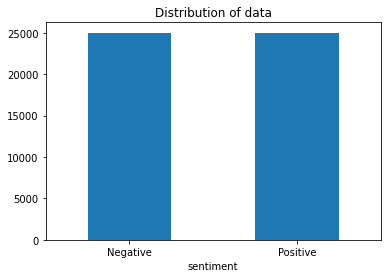

In [ ]:
# Plotting the distribution for dataset.
ax = df.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(df['text']), list(df['sentiment'])

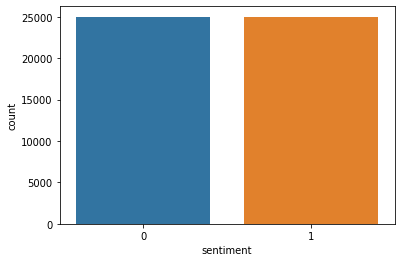

In [ ]:
import seaborn as sns
sns.countplot(x='sentiment', data=df)

In [ ]:
data = df[['text','sentiment']]


In [ ]:
data['text'] = data['text'].astype('string').str.lower()

# import re as re

# def remove_tags(string):
#     result = re.sub('<.*?>','',string)
#     return result

# data['text'] = data['address'].apply(lambda cw : remove_tags(cw))

data[['text']] = data[['text']].astype(str)

data.head()

,text,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
3,basically there's a family where a little boy ...,0
4,"petter mattei's ""love in the time of money"" is...",1


In [ ]:
#spliting data by sentiment
data_pos = data[data['sentiment'] == 1]
data_neg = data[data['sentiment'] == 0]


In [ ]:
data_pos.head()


,text,sentiment
0,one of the other reviewers has mentioned that ...,1
1,a wonderful little production. the filming tec...,1
2,i thought this was a wonderful way to spend ti...,1
4,"petter mattei's ""love in the time of money"" is...",1
5,"probably my all-time favorite movie, a story o...",1


In [ ]:
data_neg.head()


,text,sentiment
3,basically there's a family where a little boy ...,0
7,"this show was an amazing, fresh & innovative i...",0
8,encouraged by the positive comments about this...,0
10,phil the alien is one of those quirky films wh...,0
11,i saw this movie when i was about 12 when it c...,0


In [ ]:
#creating dataset
dataset = pd.concat([data_pos, data_neg])


In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   text       50000 non-null  object
 1   sentiment  50000 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 1.1+ MB


In [ ]:
# Cleaning texts

import re
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt')
# from nltk.corpus import stopwords
# from nltk.stem.porter import PorterStemmer
# from nltk.stem import WordNetLemmatizer

# # Stemming e Lemmatizing (Stemming - redução de palavras flexionadas / Lemmatizing - agrupando as formas flexionadas de uma palavra para que possam ser analisadas como um só item)

# ps = nltk.stem.PorterStemmer()
# lemma = nltk.stem.WordNetLemmatizer()
# corpus = []

# for i in range(0, 50000):
#     review = re.sub('[^a-zA-Z]', ' ', df['text'][i])
#     review = review.lower()
#     review = review.split()
#     review = [lemma.lemmatize(word) for word in review if not word in set(stopwords.words('english'))]
#     review = ' '.join(review)
#     corpus.append(review)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
#stopwordlist

stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
#removing stopwords
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['text'] = dataset['text'].apply(lambda text: cleaning_stopwords(text))
dataset['text'].head()

0    one reviewers mentioned watching 1 oz episode ...
1    wonderful little production. filming technique...
2    thought wonderful way spend time hot summer we...
4    petter mattei's "love time money" visually stu...
5    probably all-time favorite movie, story selfle...
Name: text, dtype: object

In [ ]:
#removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['text']= dataset['text'].apply(lambda x: cleaning_punctuations(x))
dataset['text'].tail()

49994    typical junk comedythere almost no laughs no g...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    no one expects star trek movies high art but f...
Name: text, dtype: object

In [ ]:
#removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_repeating_char(x))
dataset['text'].tail()

49994    typical junk comedythere almost no laughs no g...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    no one expects star trek movies high art but f...
Name: text, dtype: object

In [ ]:
#removing URL's
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_URLs(x))
dataset['text'].tail()

49994    typical junk comedythere almost no laughs no g...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    no one expects star trek movies high art but f...
Name: text, dtype: object

In [ ]:
#remving numbers
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['text'] = dataset['text'].apply(lambda x: cleaning_numbers(x))
dataset['text'].tail()

49994    typical junk comedythere almost no laughs no g...
49996    bad plot bad dialogue bad acting idiotic direc...
49997    catholic taught parochial elementary schools n...
49998    im going disagree previous comment side maltin...
49999    no one expects star trek movies high art but f...
Name: text, dtype: object

In [ ]:
#twitter tokenization
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'w+')
dataset['text'] = dataset['text'].apply(tokenizer.tokenize)
dataset['text'].head()

0    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
1                 [w, w, w, w, w, w, w, w, w, w, w, w]
2           [w, w, w, w, w, w, w, w, w, w, w, w, w, w]
4                    [w, w, w, w, w, w, w, w, w, w, w]
5                                      [w, w, w, w, w]
Name: text, dtype: object

In [ ]:
#applying stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['text']= dataset['text'].apply(lambda x: stemming_on_text(x))
dataset['text'].head()

0    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
1                 [w, w, w, w, w, w, w, w, w, w, w, w]
2           [w, w, w, w, w, w, w, w, w, w, w, w, w, w]
4                    [w, w, w, w, w, w, w, w, w, w, w]
5                                      [w, w, w, w, w]
Name: text, dtype: object

In [ ]:
#applying lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['text'] = dataset['text'].apply(lambda x: lemmatizer_on_text(x))
dataset['text'].head()

0    [w, w, w, w, w, w, w, w, w, w, w, w, w, w, w, ...
1                 [w, w, w, w, w, w, w, w, w, w, w, w]
2           [w, w, w, w, w, w, w, w, w, w, w, w, w, w]
4                    [w, w, w, w, w, w, w, w, w, w, w]
5                                      [w, w, w, w, w]
Name: text, dtype: object

In [ ]:
#separing data into feature and label
X=data.text
y=data.sentiment

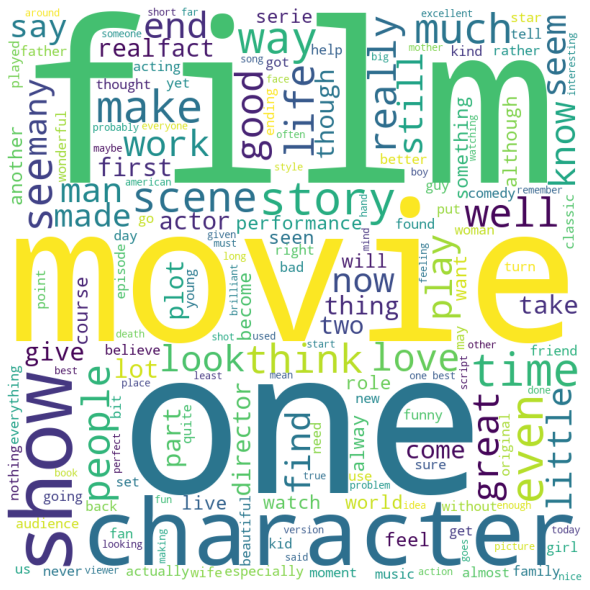

In [ ]:
# WordCloud of positive words

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size= 12).generate("".join(data_pos['text']))

plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

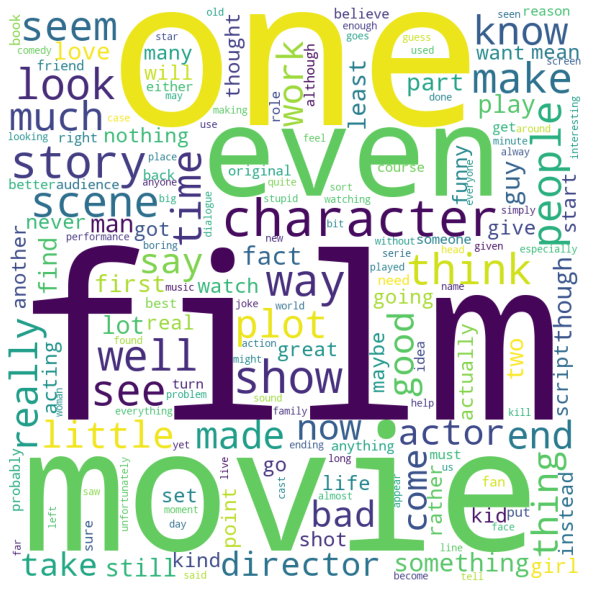

In [ ]:
# WordCloud of negative words

wordcloud = WordCloud(width = 800, height = 800, background_color ='white', min_font_size= 12).generate("".join(data_neg['text']))

plt.figure(figsize = (8,8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)

plt.show()

In [ ]:
#Spliting Data into Train and Test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1997)


In [ ]:
#Fit the TF-IDF Vectorizer
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=5000000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  2126213


In [ ]:
#Transform the data using TF-IDF Vectorizer
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [ ]:
def model_Evaluate(model):
  # Predict values for Test dataset
  y_pred = model.predict(X_test)
  # Print the evaluation metrics for the dataset.
  print(classification_report(y_test, y_pred))
  # Compute and plot the Confusion matrix
  cf_matrix = confusion_matrix(y_test, y_pred)
  categories = ['Negative','Positive']
  group_names = ['True Neg','False Pos', 'False Neg','True Pos']
  group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
  labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
  labels = np.asarray(labels).reshape(2,2)
  sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
  xticklabels = categories, yticklabels = categories)
  plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
  plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
  plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

              precision    recall  f1-score   support

           0       0.86      0.90      0.88      5008
           1       0.90      0.85      0.87      4992

    accuracy                           0.88     10000
   macro avg       0.88      0.88      0.88     10000
weighted avg       0.88      0.88      0.88     10000



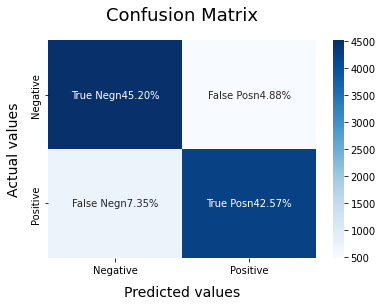

In [ ]:
BNBmodel = BernoulliNB()
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

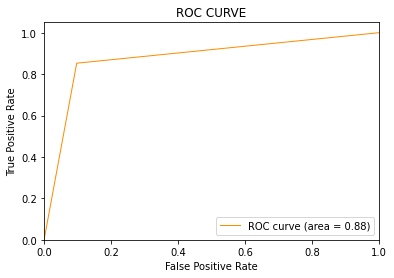

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred1)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.92      0.91      0.91      5008
           1       0.91      0.92      0.92      4992

    accuracy                           0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000



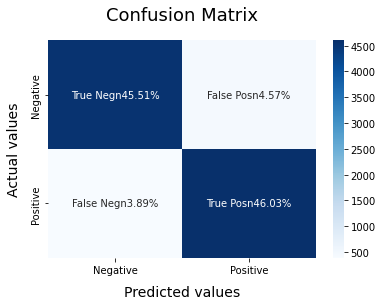

In [ ]:
SVCmodel = LinearSVC()
SVCmodel.fit(X_train, y_train)
model_Evaluate(SVCmodel)
y_pred2 = SVCmodel.predict(X_test)

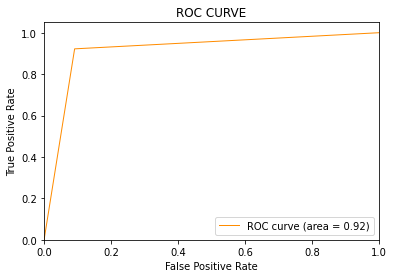

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

              precision    recall  f1-score   support

           0       0.91      0.89      0.90      5008
           1       0.89      0.91      0.90      4992

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



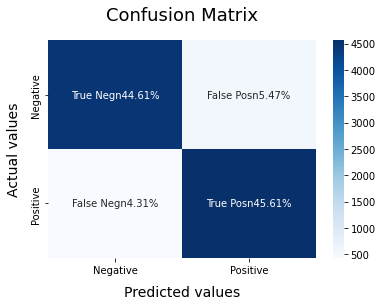

In [ ]:
LRmodel = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LRmodel.fit(X_train, y_train)
model_Evaluate(LRmodel)
y_pred3 = LRmodel.predict(X_test)

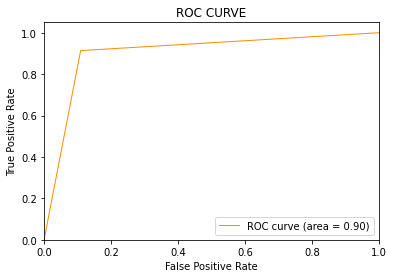

In [ ]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, thresholds = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=1, label='ROC curve (area = %0.2f)' % roc_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC CURVE')
plt.legend(loc="lower right")
plt.show()

In [ ]:
# Twitter
access_token_key = '#'
access_token_secret = '#'
consumer_key = '#'
consumer_secret = '#'
bearear_token = '#'


In [ ]:
auth = tweepy.Client(bearear_token)


In [127]:
# Searching Tweets

keyword = 'The Batman, lang:en'
max = 100
tweets = auth.search_recent_tweets(query=keyword, max_results = max)

In [128]:
tweets = pd.DataFrame(tweets.data)


In [129]:
text = tweets.text
text = text.astype('string').str.lower()

In [130]:
#Transform the data using TF-IDF Vectorizer
t = vectoriser.transform(text)


In [131]:
pred1 = BNBmodel.predict(t)
pred2 = SVCmodel.predict(t)
pred3 = LRmodel.predict(t)


In [132]:
print(text[1])
print(pred1[1])
print(pred2[1])
print(pred3[1])

rt @klitschko: month of shame. ukraine is not a battlefield. it is a crime scene.

#stopputinswar #freeukraine #weareallukrainians #standwi…
1
0
0


In [133]:
pred1 = pd.DataFrame(pred1, columns = ['sentiment'])
pred2 = pd.DataFrame(pred2, columns = ['sentiment'])
pred3 = pd.DataFrame(pred3, columns = ['sentiment'])

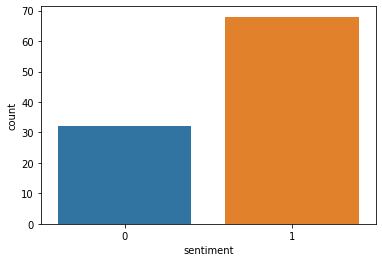

In [134]:
sns.countplot(x='sentiment', data=pred1)

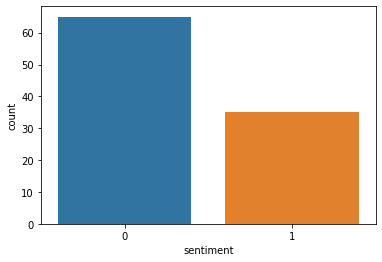

In [135]:
sns.countplot(x='sentiment', data=pred2)

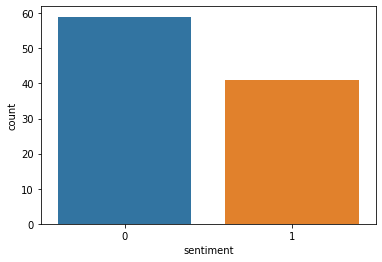

In [136]:
sns.countplot(x='sentiment', data=pred3)

In [137]:
# frames = [text, pred]

# result = pd.concat(frames, axis=1, join="inner")

# result